# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, probplot
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# **Data**

## Import Data

In [2]:
df = pd.read_csv(r"D:\Samuel\Open Datasets\Fraud Detection using AI-ML\AIML Dataset.csv")
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1463283,140,CASH_IN,91432.34,C1520422965,1620367.42,1711799.76,C823163281,162498.72,71066.38,0,0
5794631,401,PAYMENT,4806.47,C369215077,0.00,0.00,M1826179702,0.00,0.00,0,0
4656292,330,CASH_OUT,52393.43,C466097358,0.00,0.00,C1672297686,1078469.75,1130863.18,0,0
3272869,251,CASH_IN,232313.89,C248173904,40160.00,272473.89,C2103593766,133736.93,0.00,0,0
1254968,134,CASH_OUT,284926.67,C1889479311,13165.06,0.00,C777353447,1587991.82,1872918.49,0,0


## Data Exploration

In [3]:
print(df.shape)
df.info()

(6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.shape[0]

6362620

In [9]:
round((df['isFraud'].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.13)

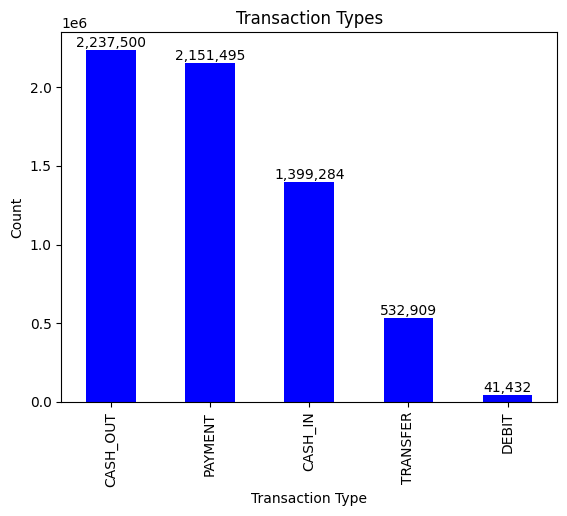

In [10]:
ax = df['type'].value_counts().plot(kind='bar', title="Transaction Types", color='blue')

labels = [f"{int(v.get_height()):,}" for v in ax.containers[0]]
ax.bar_label(ax.containers[0], labels=labels)

plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

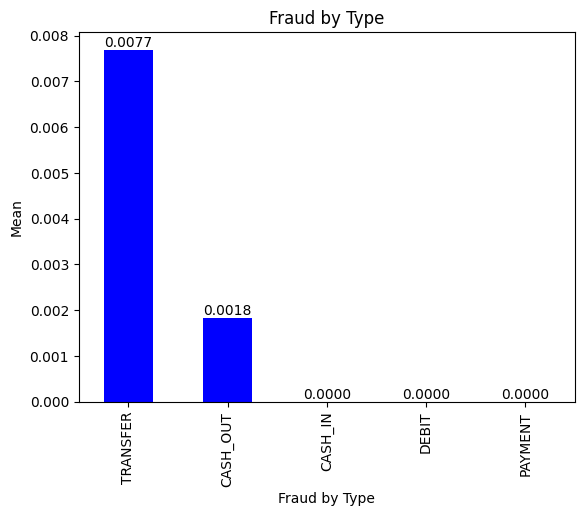

In [11]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)

ax = fraud_by_type.plot(kind='bar', title="Fraud by Type", color='blue')

labels = [f"{v.get_height():.4f}" for v in ax.containers[0]]
ax.bar_label(ax.containers[0], labels=labels)

plt.xlabel("Fraud by Type")
plt.ylabel("Mean")
plt.show()

In [12]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

In [13]:
def check_skewness(series, bins=30):
    """
    Visualize data distribution to check skewness.
    Displays histogram + KDE, boxplot, QQ plot, and skewness values..
    
    Parameters
    ----------
    series : pandas.Series
        Numerical data to be analyzed
    bins : int
        Number of bins for histogram
    """
    data = series.dropna()  # drop missing values
    skewness = skew(data)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1. Histogram + KDE
    sns.histplot(data, kde=True, bins=bins, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram + KDE\nSkewness = {skewness:.2f}")
    axes[0].set_xlabel(series.name)
    axes[0].set_ylabel("Frequency")

    # 2. Boxplot
    sns.boxplot(x=data, ax=axes[1], color="lightgreen")
    axes[1].set_title("Boxplot")

    # 3. QQ Plot
    probplot(data, dist="norm", plot=axes[2])
    axes[2].set_title("Q-Q Plot (Normal Distribution)")

    plt.tight_layout()
    plt.show()


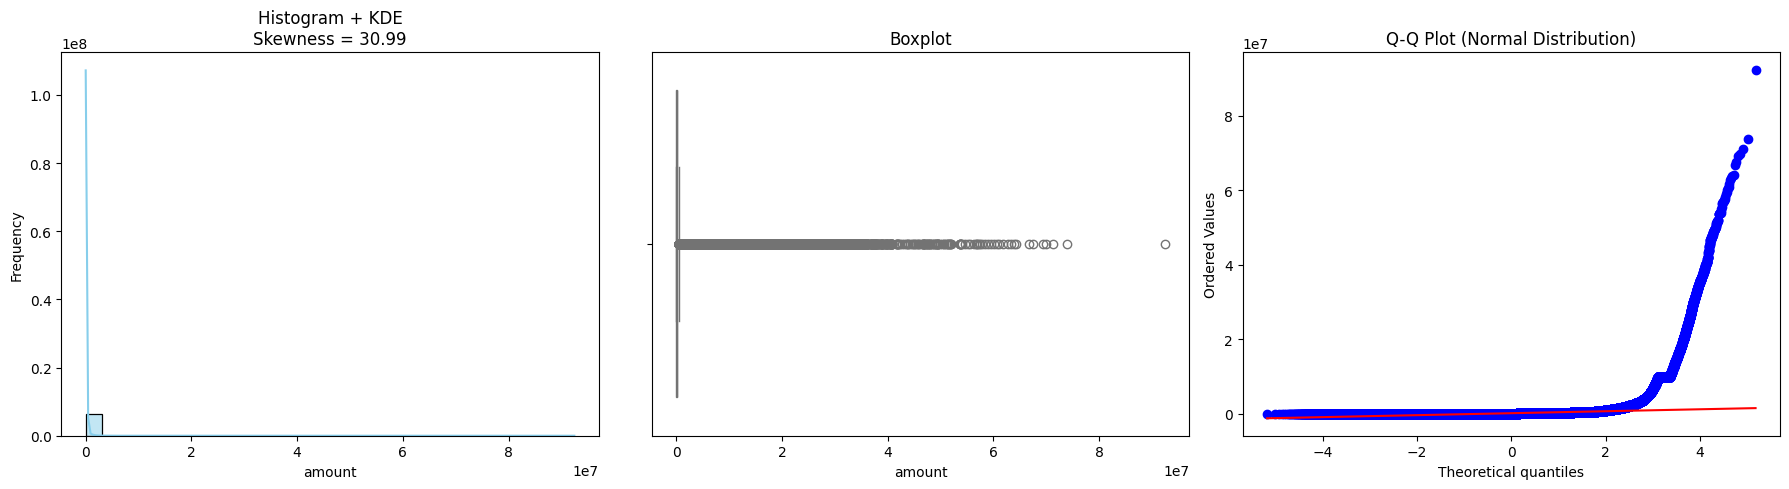

In [14]:
check_skewness(df['amount'])

Lambda Box-Cox: 0.11202817329653067
Lambda Yeo-Johnson: 0.11202815885111742


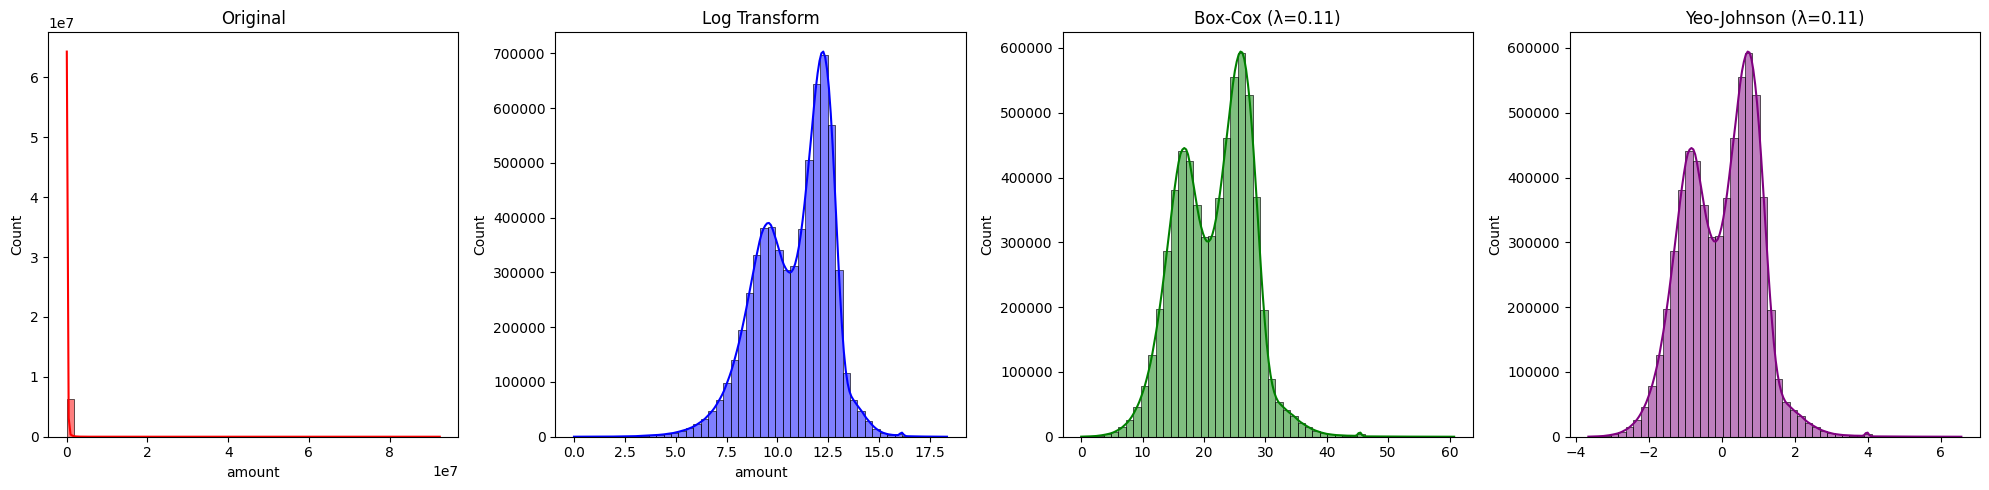

In [15]:
amount = df['amount']

# Log
log_amount = np.log1p(amount)

# Box-Cox
boxcox_amount, lambda_bc = stats.boxcox(amount + 1)

# Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
yeojohnson_amount = pt.fit_transform(amount.to_numpy().reshape(-1, 1)).flatten()

print("Lambda Box-Cox:", lambda_bc)
print("Lambda Yeo-Johnson:", pt.lambdas_[0])

fig, axes = plt.subplots(1, 4, figsize=(20,5))

sns.histplot(amount, bins=50, kde=True, ax=axes[0], color='red')
axes[0].set_title("Original")

sns.histplot(log_amount, bins=50, kde=True, ax=axes[1], color='blue')
axes[1].set_title("Log Transform")

sns.histplot(boxcox_amount, bins=50, kde=True, ax=axes[2], color='green')
axes[2].set_title(f"Box-Cox (λ={lambda_bc:.2f})")

sns.histplot(yeojohnson_amount, bins=50, kde=True, ax=axes[3], color='purple')
axes[3].set_title(f"Yeo-Johnson (λ={pt.lambdas_[0]:.2f})")

plt.tight_layout()
plt.show()

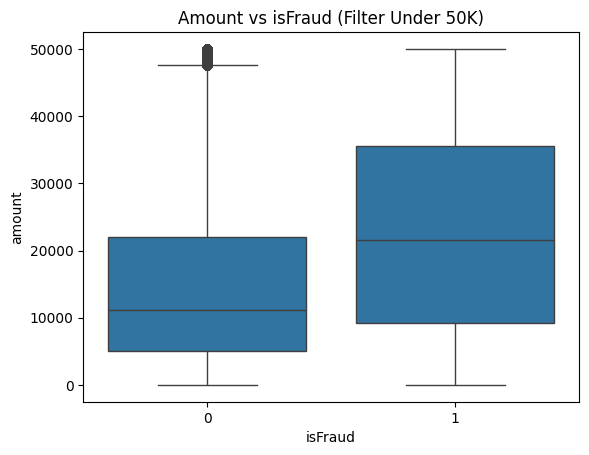

In [16]:
sns.boxplot(data=df[df['amount'] < 50000], x='isFraud', y='amount')
plt.title("Amount vs isFraud (Filter Under 50K)")
plt.show()

**Key conclusions about this boxplot**
* Fraudulent transactions tend to involve larger amounts of money than normal transactions, this is evident from the higher median.
* The variation (spread) of fraudulent transactions is also wider → there are small transactions but also very large ones.
* There are more outliers in normal transactions, although there are still large fraudulent amounts, but they are within the whisker range.

**Check Balance Difference (Origin & Destination)**
* Is there any negative values?

In [19]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [18]:
(df['balanceDiffOrig'] < 0).sum()

np.int64(1399253)

In [19]:
(df['balanceDiffDest'] < 0).sum()

np.int64(1238864)

In [20]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0


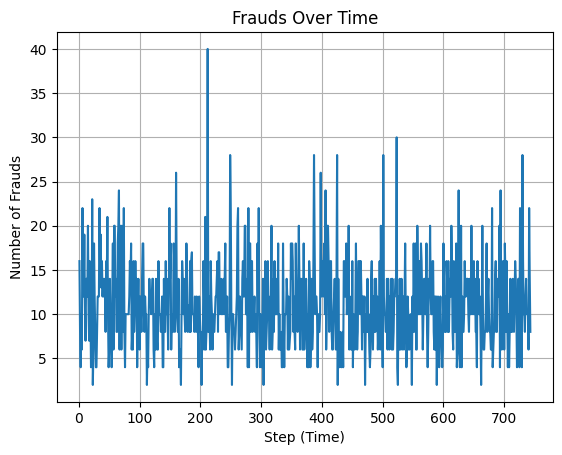

In [21]:
frauds_per_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Fraud per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

**Key Conclusion About The Plot**
* The 'Step' column is non time dependent

In [22]:
df.drop(columns="step", inplace=True)

In [24]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [26]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [27]:
top_receivers = df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [28]:
fraud_by_user = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)
fraud_by_user

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [30]:
fraud_types = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
fraud_types.head(10)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0,15325.00,46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0,705.00,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0,10835.00,2712905.89
42,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0,26845.41,-286384.84
47,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0,1942.02,-6146.82
48,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0,0.00,5800793.91
51,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0,20411.53,-25742.00
58,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0,62610.80,7866.29


In [31]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

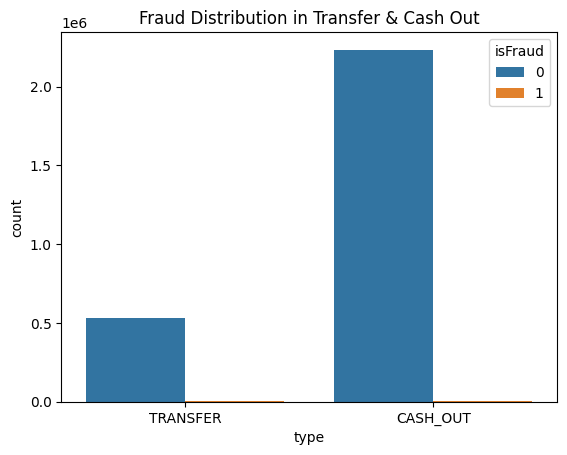

In [32]:
sns.countplot(data=fraud_types, x='type', hue='isFraud')
plt.title('Fraud Distribution in Transfer & Cash Out')
plt.show()

In [33]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


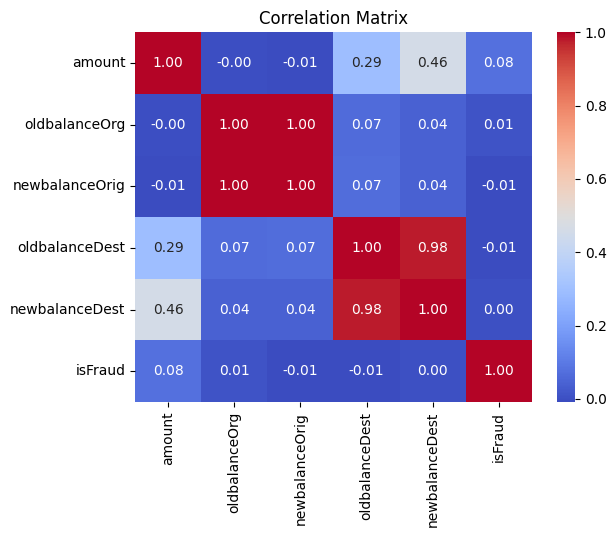

In [34]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [36]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]

len(zero_after_transfer)

1188074

In [37]:
zero_after_transfer.head(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [38]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

## Feature Engineering & Training ML Model

### Feature Engineering

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [40]:
df.head(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [41]:
df_model = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
df_model.head(4)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0


In [42]:
categorical = ['type']
numerical = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [43]:
y = df_model['isFraud']
X = df_model.drop(['isFraud'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop'
)

In [47]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [48]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
y_pred = pipeline.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



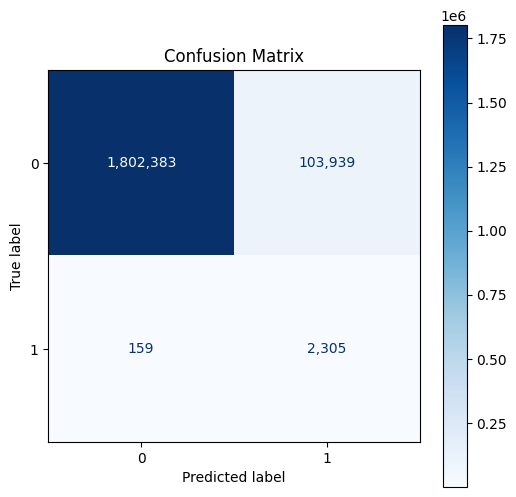

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap='Blues', values_format=',')

plt.title("Confusion Matrix")
plt.show()

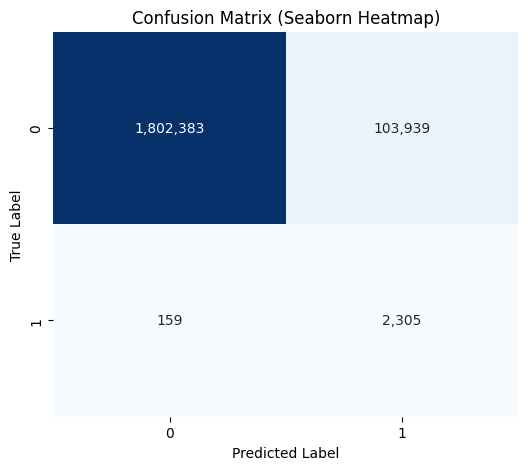

In [53]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt=',', cmap='Blues', cbar=False,
    xticklabels=[0, 1], yticklabels=[0, 1]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Seaborn Heatmap)")
plt.show()

**Catatan**

Data yang digunakan untuk membuat klasifikasi Logistic Regression adalah data yang tidak seimbang (imbalanced).
* Kelas 0 (mayoritas): jumlahnya 1.906.232 data
* Kelas 1 (minoritas): jumlahnya 2.464 data

*1. Precision*
* Kelas 0: 1.00 → Hampir semua prediksi yang dikatakan "0" benar-benar 0.
* Kelas 1: 0.02 → Sangat buruk. Hanya 2% dari prediksi "1" yang benar-benar 1. Artinya banyak false positives untuk kelas 1.
Model kesulitan mengenali kelas 1 (karena jumlahnya sangat sedikit dibanding kelas 0)

*2. Recall*
* Kelas 0: 0.95 → 95% dari semua data kelas 0 berhasil dikenali.
* Kelas 1: 0.94 → Sangat tinggi, hampir semua data kelas 1 berhasil ditemukan.
Model cenderung menandai banyak data sebagai kelas 1, sehingga hampir semua data kelas 1 tertangkap (recall tinggi) tapi precision-nya rendah.

*3. F1-Score*
* Kelas 0: 0.97 → Begus sekali, seimbang antara precision dan recall.
* Kelas 1: 0.04 → Sangat buruk, karena precision sangat rendah sekali.
Walaupun recall tinggi, precision rendah membuat f1-score buruk untuk kelas 1.

*4. Accuracy*
Akurasi sebesar 0.95, terlihat sangat tinggi tetapi bias (menipu) karena dataset sangat imbalanced. Akurasi tinggi terutama karena kelas 0 mendominasi.

*5. Macro Average*
* Precision: 0.51
* Recall: 0.94
* F1-Score: 0.51
Macro avg menghitung rata-rata antar kelas tanpa memperhatikan proporsi data. Terlihat recall tinggi, tapi precision & f1 sangat rendah.

*6. Weighted Average*
* Precision: 1.00
* Recall: 0.95
* F1-Score: 0.97
Ini berat sebelah karena kelas 0 jumlahnya jauh lebih banyak, sehingga menutupi performa buruk di kelas 1.

**Kesimpulan**
* Model sangat baik dalam mengenali kelas mayoritas (0).
* Model juga cukup sensitif terhadap kelas minoritas (recall 0.94), tapi tidak selektif sehingga hampir semua prediksi 1 salah (precision 0.02).
* Accuracy terlihat bagus, tapi tidak mencerminkan performa sebenarnya pada kelas minoritas.
Masalah utama: *Imbalanced dataset* → Model kesulitan menyeimbangkan precision dan recall untuk kelas 1.

**Saran Perbaikan**

*1. Gunakan Teknik Balancing Data*
* Oversampling kelas minoritas (SMOTE, Random Oversampling)
* Undersampling kelas mayoritas

*2. Gunakan Metrik Lain*
* ROC-AUC
* PR-AUC
* Confusion Matrix

*3. Tuning Threshold Decision*
* Karena terlihat recall sudah bagus, bisa coba menurunkan *false positives* agar precision naik

*4. Gunakan Model Khusus Imbalanced*
* BalancedRandomForest
* XGBoost dengan scale_pos_weight, atau
* class_weight = 'balanced' di sklearn



**Referensi**

* https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb
* https://www.youtube.com/watch?v=6kwEbsCiLg8
* 